# email spam/ham



In [4]:
## libraries 
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
import seaborn as sns

In [5]:
raw_mail_data = pd.read_csv("mail_data_spam.csv")

In [6]:
raw_mail_data .sample(5)

,Category,Message
1276,ham,Wot u up 2 u weirdo?
4973,ham,I'm fine. Hope you are good. Do take care.
4553,ham,"SYMPTOMS when U are in love: ""1.U like listeni..."
25,ham,Just forced myself to eat a slice. I'm really ...
1699,spam,"Free msg. Sorry, a service you ordered from 81..."


In [7]:
##replacing null values to string 
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [8]:
raw_mail_data.shape

(5572, 2)

In [9]:
raw_mail_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [10]:
raw_mail_data.duplicated().sum()

415

In [11]:
raw_mail_data =raw_mail_data.drop_duplicates(keep='first')

In [12]:
raw_mail_data.duplicated().sum()

0

In [13]:
raw_mail_data.shape

(5157, 2)

## EDA

In [14]:
raw_mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
raw_mail_data.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [16]:
raw_mail_data['Category'].value_counts()

ham     4516
spam     641
Name: Category, dtype: int64

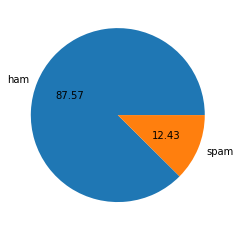

In [17]:
import matplotlib.pyplot as plt
plt.pie(raw_mail_data['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

# data is imbalanced

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
raw_mail_data['num_characters'] = raw_mail_data['Message'].apply(len)

In [21]:
raw_mail_data.head()

,Category,Message,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# num of words
raw_mail_data['num_words'] = raw_mail_data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
raw_mail_data.head()

,Category,Message,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
raw_mail_data['num_sentences'] = raw_mail_data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
raw_mail_data.head()

,Category,Message,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
raw_mail_data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560016,1.965290
std,58.382922,13.403671,1.439549
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
##label encoding 
## label spam as 0 ; &; ham as 1
## loc is used for boolean array 
mail_data.loc[mail_data['Category']== 'spam','Category',]=0

In [28]:
mail_data.loc[mail_data['Category']== 'ham','Category',]=1

In [29]:
# ham
raw_mail_data[raw_mail_data['Category'] == 'ham'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267272,1.822852
std,56.708301,13.585433,1.374848
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
raw_mail_data[raw_mail_data['Category'] == 'spam'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.968799
std,30.399707,7.103501,1.486069
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

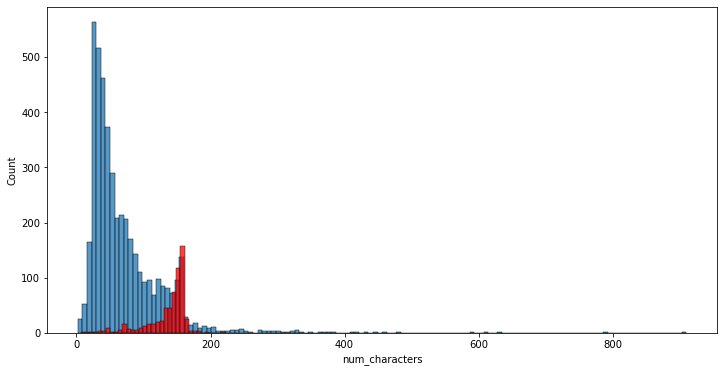

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(raw_mail_data[raw_mail_data['Category'] == 'ham']['num_characters'])
sns.histplot(raw_mail_data[raw_mail_data['Category'] == 'spam']['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

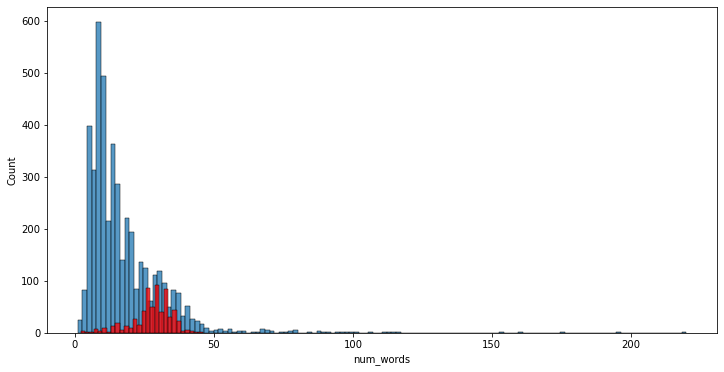

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(raw_mail_data[raw_mail_data['Category'] == 'ham']['num_words'])
sns.histplot(raw_mail_data[raw_mail_data['Category'] == 'spam']['num_words'],color='red')

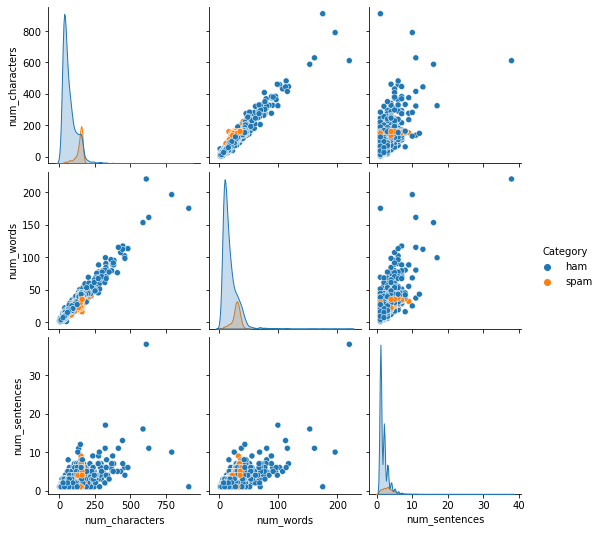

In [33]:
sns.pairplot(raw_mail_data,hue='Category')

<AxesSubplot:>

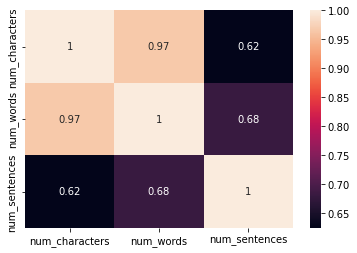

In [34]:
sns.heatmap(raw_mail_data.corr(),annot=True)

## DISTRIBUTION OF DATA

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_characters', ylabel='Density'>

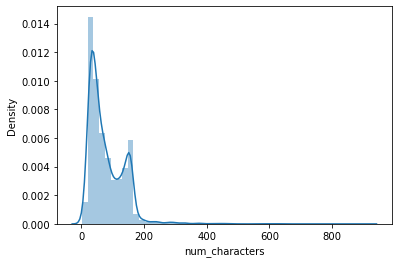

In [55]:

sns.distplot(raw_mail_data['num_characters'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_words', ylabel='Density'>

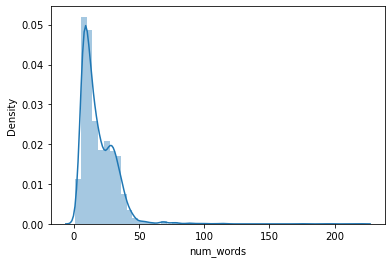

In [57]:
sns.distplot(raw_mail_data['num_words'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_sentences', ylabel='Density'>

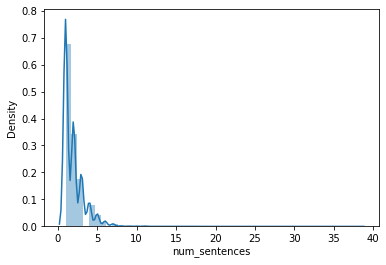

In [56]:
sns.distplot(raw_mail_data['num_sentences'])

## spam - 0
## ham - 1

In [35]:
## input col == messgaes 
## output col == category 
## seperating the data as text and label

In [36]:
x=mail_data['Message']
y=mail_data['Category']


In [37]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [38]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 3)

In [40]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5572,)
(4457,)
(1115,)


In [41]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(5572,)
(4457,)
(1115,)


In [42]:
## transform the text data to feature vectors that can be transformed as input to the logistic regression 
feature_extraction = TfidfVectorizer(min_df =1 , stop_words='english', lowercase='True')

In [43]:
x_train_features= feature_extraction.fit_transform(x_train)

In [44]:
x_test_features = feature_extraction.transform(x_test)

In [45]:
# convert Y_train and Y_test values as integers

y_train = y_train.astype('int')
y_test = y_test.astype('int')


In [46]:
print(x_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

In [47]:
print(x_test_features)

  (0, 7271)	0.1940327008179069
  (0, 6920)	0.20571591693537986
  (0, 5373)	0.2365698724638063
  (0, 5213)	0.1988547357502182
  (0, 4386)	0.18353336340308998
  (0, 1549)	0.2646498848307188
  (0, 1405)	0.3176863938914351
  (0, 1361)	0.25132445289897426
  (0, 1082)	0.2451068436245027
  (0, 1041)	0.28016206931555726
  (0, 405)	0.2381316303003606
  (0, 306)	0.23975986557206702
  (0, 20)	0.30668032384591537
  (0, 14)	0.26797874471323896
  (0, 9)	0.2852706805264544
  (0, 1)	0.2381316303003606
  (1, 7368)	0.29957800964520975
  (1, 6732)	0.42473488678029325
  (1, 6588)	0.3298937975962767
  (1, 6507)	0.26731535902873493
  (1, 6214)	0.3621564482127515
  (1, 4729)	0.22965776503163893
  (1, 4418)	0.3457696891316818
  (1, 3491)	0.496093956101028
  (2, 7205)	0.22341717215670331
  :	:
  (1110, 3167)	0.5718357066163949
  (1111, 7353)	0.4991205841293424
  (1111, 6787)	0.40050175714278885
  (1111, 6033)	0.4714849709283488
  (1111, 3227)	0.44384935772735523
  (1111, 2440)	0.4137350055985486
  (1112, 7071)

## training the model 

In [48]:
##logistic regression 
model = LogisticRegression()

In [49]:
model.fit(x_train_features, y_train)

LogisticRegression()

In [50]:
model.score(x_train_features,y_train)

0.9670181736594121

In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_features,y_train)
lr.score(x_test_features,y_test)

0.7625362752761123

In [53]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train_features,y_train)
rf.score(x_test_features,y_test)

0.792750124327957

on compairing regression model logistic_regression>random_forest_regression>linear_regression

##  evaluating the trained model 

In [29]:
prediction_on_training_data = model.predict(x_train_features)

In [30]:
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [31]:
print(accuracy_on_training_data)

0.9670181736594121


In [33]:
prediction_on_test_data = model.predict(x_test_features)

## building a predictive system

In [34]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

In [35]:
## convert text to features 
input_data_features  = feature_extraction.transform(input_mail )

In [37]:
## making prediction
prediction = model.predict(input_data_features )
print(prediction)

[1]


In [38]:
if(prediction[0]==1):
    print('ham mail')
else:
        print('spam mail')

ham mail
